In [1]:
import numpy as np

In [2]:
data=np.load('data.npy')
target= np.load('target.npy')

In [3]:
data.shape

(694, 100, 100, 1)

In [4]:
target=target.argmax(axis=1)

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size = 0.1)

In [6]:
x_test.shape

(70, 100, 100, 1)

In [7]:
import tensorflow as tf
from tensorflow.keras import models,layers

In [8]:
cnn=models.Sequential([
    layers.Conv2D(filters = 32 , kernel_size=(3,3),activation='relu',input_shape=(100,100,1)),
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(2,2),
    
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(14,activation='softmax')
])

In [9]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
r_cnn=cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
20/20 [==============================] - 6s 204ms/step - loss: 2.6713 - accuracy: 0.0962
Epoch 2/10
20/20 [==============================] - 4s 206ms/step - loss: 2.5433 - accuracy: 0.2099
Epoch 3/10
20/20 [==============================] - 4s 211ms/step - loss: 2.1428 - accuracy: 0.4038
Epoch 4/10
20/20 [==============================] - 4s 208ms/step - loss: 1.4756 - accuracy: 0.6186
Epoch 5/10
20/20 [==============================] - 4s 212ms/step - loss: 0.7952 - accuracy: 0.7981
Epoch 6/10
20/20 [==============================] - 4s 212ms/step - loss: 0.4776 - accuracy: 0.8814
Epoch 7/10
20/20 [==============================] - 4s 209ms/step - loss: 0.2421 - accuracy: 0.9503
Epoch 8/10
20/20 [==============================] - 4s 211ms/step - loss: 0.2158 - accuracy: 0.9583
Epoch 9/10
20/20 [==============================] - 4s 208ms/step - loss: 0.1426 - accuracy: 0.9728
Epoch 10/10
20/20 [==============================] - 4s 208ms/step - loss: 0.1401 - accuracy: 0.9696

In [11]:
cnn.evaluate(x_test,y_test,verbose=2)

3/3 - 0s - loss: 1.0888 - accuracy: 0.8429 - 407ms/epoch - 136ms/step


[1.0887601375579834, 0.8428571224212646]

In [12]:
y_pred=cnn.predict(x_test).argmax(axis=1)

3/3 [==============================] - 0s 21ms/step


In [13]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix \n",cm)

Confusion Matrix 
 [[7 0 0 0 0 1 3 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 1 0 0 1 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 2 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 5 0 0 0 2 0 1]
 [0 0 0 0 1 0 0 2 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 1 0 0]
 [0 0 0 1 0 1 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 1]
 [0 0 0 0 0 0 1 0 0 0 0 0 3]]


In [14]:
Categories=['Affenhuahua dog',
 'Afgan Hound dog',
 'Akita dog',
 'Alaskan Malamute dog',
 'American Bulldog dog',
 'Auggie dog',
 'Beagle dog',
 'Belgian Tervuren dog',
 'Bichon Frise dog',
 'Bocker dog',
 'Borzoi dog',
 'Boxer dog',
 'Bugg dog',
 'Bulldog dog']

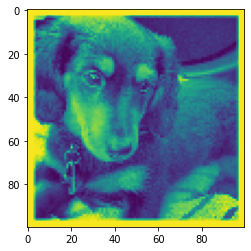

In [15]:
import matplotlib.pyplot as plt
plt.imshow(x_test[2])

In [16]:
Categories[y_test[2]]

'Affenhuahua dog'

In [17]:
Categories[y_pred[2]]

'Affenhuahua dog'